In [54]:
pip install scikit-learn -U

     |████████████████████████████████| 7.2 MB 2.1 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
Note: you may need to restart the kernel to use updated packages.


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv('bcw_new.csv')
df.columns
df = df.replace('?', np.NaN)
df.head(10)

,Unnamed: 0,Sample.code.number,Clump.Thickness,Uniformity.of.Cell.Size,Uniformity.of.Cell.Shape,Marginal.Adhesion,Single.Epithelial.Cell.Size,Bare.Nuclei,Bland.Chromatin,Normal.Nucleoli,Mitoses,Class
0,1,1000025,5,1,1,1,2,1,3,1,1,2
1,2,1002945,5,4,4,5,7,10,3,2,1,2
2,3,1015425,3,1,1,1,2,2,3,1,1,2
3,4,1016277,6,8,8,1,3,4,3,7,1,2
4,5,1017023,4,1,1,3,2,1,3,1,1,2
5,6,1017122,8,10,10,8,7,10,9,7,1,4
6,7,1018099,1,1,1,1,2,10,3,1,1,2
7,8,1018561,2,1,2,1,2,1,3,1,1,2
8,9,1033078,2,1,1,1,2,1,1,1,5,2
9,10,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
df = df.dropna()

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

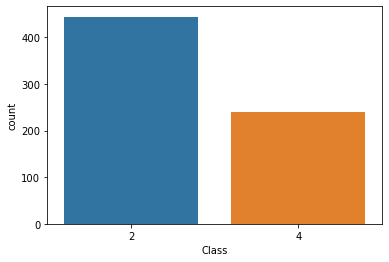

In [4]:
# y includes diagnosis column with M or B values
y = df.Class

# drop the column 'id' as it is does not convey useful info
# drop diagnosis since we are separating labels and features

list = ['Unnamed: 0', 'Sample.code.number', 'Class']

# X includes our features
X = df.drop(list,axis=1)
# 누락된 모든 값(na, NAN, NaN) 열삭제
df = df.dropna(axis=1)


# M 및 B 셀의 갯수를 가져옵니다.
df['Class'].value_counts()

# Visualize this count
sns.countplot(df['Class'], label = "Count")

<AxesSubplot:>

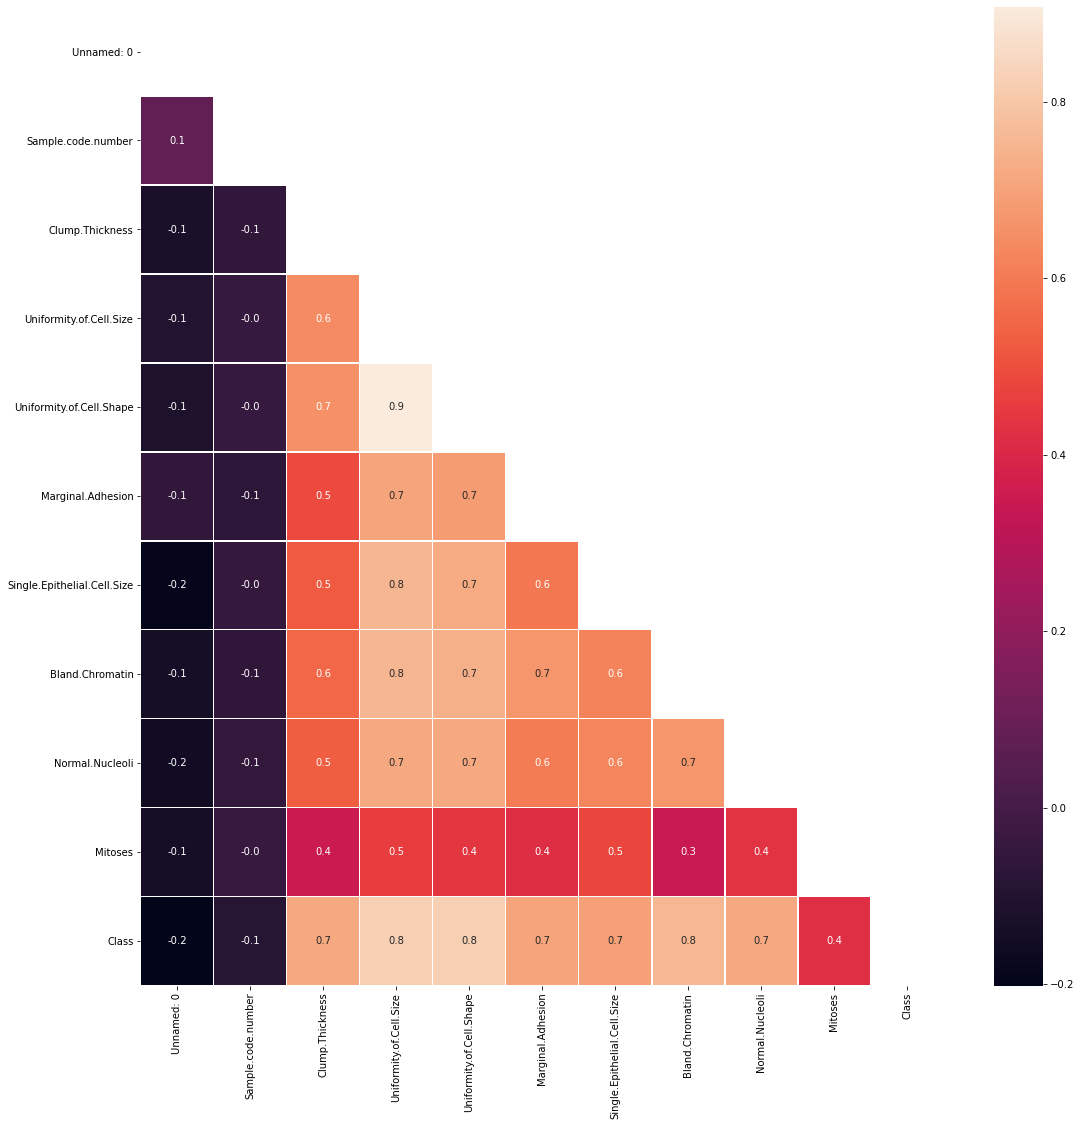

In [5]:
#correlation map
f, ax = plt.subplots(figsize = (18, 18))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, linewidths =.5, fmt = '.1f', ax = ax, mask=matrix)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40,stratify=y,random_state=17)

In [7]:
#Feature Scaling
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Define a function which trains models
def models(X_train, y_train):
    
    #Using Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, y_train)
    
    #Using SVC linear
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, y_train)
    
    #Using SVC rbf
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, y_train)
    
    #Using DecisionTreeClassifier
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, y_train)
    
    #Using RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, y_train)
    
    #model accuracy on the training data.
    print(log.score(X_train, y_train))
    print(svc_lin.score(X_train, y_train))
    print(svc_rbf.score(X_train, y_train))
    print(tree.score(X_train, y_train))
    print(forest.score(X_train, y_train))
    
    return log, svc_lin, svc_rbf, tree, forest

#get the training results
model = models(X_train, y_train)

0.9731051344743277
0.9731051344743277
0.9731051344743277
1.0
1.0


In [51]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
    print('Model', i)
    #Check precision, recall, f1-socre
    print(classification_report(y_test, model[i].predict(X_test)))
    #Another way to get the models accuracy on the test data
    print(accuracy_score(y_test, model[i].predict(X_test)))
    print()

Model 0
              precision    recall  f1-score   support

           2       0.95      0.96      0.96       112
           4       0.93      0.90      0.92        63

    accuracy                           0.94       175
   macro avg       0.94      0.93      0.94       175
weighted avg       0.94      0.94      0.94       175

0.9428571428571428

Model 1
              precision    recall  f1-score   support

           2       0.97      0.96      0.97       112
           4       0.94      0.95      0.94        63

    accuracy                           0.96       175
   macro avg       0.96      0.96      0.96       175
weighted avg       0.96      0.96      0.96       175

0.96

Model 2
              precision    recall  f1-score   support

           2       0.97      0.96      0.97       112
           4       0.94      0.95      0.94        63

    accuracy                           0.96       175
   macro avg       0.96      0.96      0.96       175
weighted avg       0.96 

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve

In [14]:
#Classifier 1 - Using Logistic Regression
log = LogisticRegression(random_state = 0)
log.fit(X_train, y_train)
log_prediction_proba = log.predict_proba(X_train)   
log_prediction_proba

array([[1.07430143e-02, 9.89256986e-01],
       [2.16142459e-03, 9.97838575e-01],
       [9.90877867e-01, 9.12213304e-03],
       [9.70313779e-01, 2.96862209e-02],
       [1.11058058e-01, 8.88941942e-01],
       [1.00666489e-03, 9.98993335e-01],
       [8.42406736e-03, 9.91575933e-01],
       [9.38271428e-01, 6.17285716e-02],
       [9.97783861e-01, 2.21613928e-03],
       [9.95025769e-01, 4.97423056e-03],
       [9.95025352e-01, 4.97464788e-03],
       [9.93808050e-01, 6.19195032e-03],
       [9.90867979e-01, 9.13202086e-03],
       [9.95025769e-01, 4.97423056e-03],
       [9.94833044e-01, 5.16695578e-03],
       [5.15448138e-01, 4.84551862e-01],
       [9.79310481e-01, 2.06895191e-02],
       [3.42434406e-03, 9.96575656e-01],
       [9.92014089e-01, 7.98591082e-03],
       [9.78474809e-01, 2.15251905e-02],
       [9.96757339e-01, 3.24266072e-03],
       [9.92976126e-01, 7.02387435e-03],
       [9.94561297e-01, 5.43870266e-03],
       [9.97887415e-01, 2.11258456e-03],
       [9.978874

In [24]:
#Classifier 2 - Using SVC linear
from sklearn.svm import SVC
svc_lin = SVC(kernel = 'linear', random_state = 0, probability=True)
svc_lin.fit(X_train, y_train)
svc_lin_prediction_proba = svc_lin.predict_proba(X_train)
svc_lin_prediction_proba

array([[2.44171044e-02, 9.75582896e-01],
       [5.00501241e-03, 9.94994988e-01],
       [9.83591759e-01, 1.64082406e-02],
       [9.59446030e-01, 4.05539700e-02],
       [1.05884088e-01, 8.94115912e-01],
       [3.54634957e-03, 9.96453650e-01],
       [9.49313343e-03, 9.90506867e-01],
       [9.25120430e-01, 7.48795699e-02],
       [9.96381624e-01, 3.61837646e-03],
       [9.91940886e-01, 8.05911427e-03],
       [9.91981935e-01, 8.01806508e-03],
       [9.90651516e-01, 9.34848351e-03],
       [9.82867404e-01, 1.71325960e-02],
       [9.91940886e-01, 8.05911427e-03],
       [9.91718239e-01, 8.28176142e-03],
       [6.33537038e-01, 3.66462962e-01],
       [9.58866208e-01, 4.11337915e-02],
       [5.18076839e-03, 9.94819232e-01],
       [9.87505641e-01, 1.24943592e-02],
       [9.65217749e-01, 3.47822512e-02],
       [9.94679034e-01, 5.32096642e-03],
       [9.88098865e-01, 1.19011350e-02],
       [9.91149196e-01, 8.85080424e-03],
       [9.96487227e-01, 3.51277274e-03],
       [9.964872

In [22]:
#Classifier 3 - Using SVC rbf
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', random_state = 0, probability=True)
svc_rbf.fit(X_train, y_train)
svc_rbf_prediction_proba = svc_rbf.predict_proba(X_train)
svc_rbf_prediction_proba

array([[0.01590209, 0.98409791],
       [0.01379243, 0.98620757],
       [0.99443807, 0.00556193],
       [0.98921799, 0.01078201],
       [0.12840844, 0.87159156],
       [0.02076816, 0.97923184],
       [0.02574047, 0.97425953],
       [0.97652264, 0.02347736],
       [0.99412812, 0.00587188],
       [0.99561025, 0.00438975],
       [0.98585992, 0.01414008],
       [0.99553822, 0.00446178],
       [0.9939706 , 0.0060294 ],
       [0.99561025, 0.00438975],
       [0.99537112, 0.00462888],
       [0.06616714, 0.93383286],
       [0.98673958, 0.01326042],
       [0.0082088 , 0.9917912 ],
       [0.99533695, 0.00466305],
       [0.99107282, 0.00892718],
       [0.99640466, 0.00359534],
       [0.99524663, 0.00475337],
       [0.99670976, 0.00329024],
       [0.99651095, 0.00348905],
       [0.99651095, 0.00348905],
       [0.99524663, 0.00475337],
       [0.9952878 , 0.0047122 ],
       [0.99640466, 0.00359534],
       [0.04389416, 0.95610584],
       [0.99632536, 0.00367464],
       [0.

In [18]:
#Classifier 4 - Using Classification Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, y_train)
tree.fit_prediction_proba = tree.predict_proba(X_train)
tree.fit_prediction_proba

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [20]:
#Classifier 5 - Using Random Forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, y_train)
forest_prediction_proba = forest.predict_proba(X_train)
forest_prediction_proba

array([[0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0. , 1. ],
       [0.2, 0.8],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.9, 0.1],
       [0. , 1. ],
       [0.9, 0.1],
       [0. , 1. ],
       [0. , 1. ],
       [1. ,

In [25]:
#Stacking Classifier with Scikit-learn(Meta_Classifier)
from sklearn.ensemble import StackingClassifier

In [36]:
estimators = [('Logistic',log),
              ('SVC linear', svc_lin),
              ('SVC rbf', svc_rbf),
              ('Classification Tree',tree),
              ('Random Forest',forest)]

stack_clf_fit =StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack_clf_fit.fit(X_train,y_train)
stack_predictions = stack_clf_fit.predict(X_train)
stack_predictions

array([4, 4, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2,
       2, 4, 4, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2,
       4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2,
       2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4,
       2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4,
       2, 2, 4, 2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2,
       2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4,

In [37]:
confusion_matrix(y_train,stack_predictions)

array([[262,   4],
       [  3, 140]])

In [38]:
#Voting classifier
voting_clf_fit = VotingClassifier(
estimators = [('Logistic',log),
              ('SVC linear', svc_lin),
              ('SVC rbf', svc_rbf),
              ('Classification Tree',tree),
              ('Random Forest',forest)])
voting_clf_fit.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic', LogisticRegression(random_state=0)),
                             ('SVC linear',
                              SVC(kernel='linear', probability=True,
                                  random_state=0)),
                             ('SVC rbf', SVC(probability=True, random_state=0)),
                             ('Classification Tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     random_state=0)),
                             ('Random Forest',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=10,
                                                     random_state=0))])

In [39]:
for clf in (log,svc_lin,svc_rbf,tree,forest,voting_clf_fit):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_train)
    print(clf.__class__.__name__,accuracy_score(y_train,y_pred))

LogisticRegression 0.9731051344743277
SVC 0.9731051344743277
SVC 0.9731051344743277
DecisionTreeClassifier 1.0
RandomForestClassifier 1.0
VotingClassifier 0.9779951100244498
